**Machine Learning - 2 - Regresi**

**Ali Fatta Maulana - 1103223228**

In [ ]:
pip install gdown


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [ ]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=04e7b756-20e3-46a9-b1dd-55bf8a7caa5b
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:07<00:00, 59.8MB/s]


'midterm-regresi-dataset.csv'

In [ ]:
import pandas as pd


# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [ ]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515344, 91)


In [ ]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor

Split Data

In [ ]:
try:
    df = pd.read_csv(file_path, header=None)

    # Beri nama kolom agar rapi (Kolom 0 = Year, sisanya Fitur)
    df.columns = ['Year'] + [f'Feat_{i}' for i in range(1, 91)]

    print(f"✅ Data Berhasil Dimuat!")
    print(f"   Total Baris : {df.shape[0]}")
    print(f"   Total Fitur : {df.shape[1]-1}")

except FileNotFoundError:
    print("❌ Error: File CSV belum diupload. Silakan upload file terlebih dahulu.")
    df = pd.DataFrame()

✅ Data Berhasil Dimuat!
   Total Baris : 515345
   Total Fitur : 90


Training Model

In [ ]:
X = df.drop(columns=['Year'])
y = df['Year']

# Split 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"   Data Training : {X_train.shape[0]} baris")
print(f"   Data Testing  : {X_test.shape[0]} baris")

   Data Training : 412276 baris
   Data Testing  : 103069 baris


In [ ]:
print("\n🚀 Memulai Training dengan CatBoost (Mode GPU)...")

model = CatBoostRegressor(
 iterations=5000,          # Maksimum pohon (bisa stop lebih awal)
 learning_rate=0.05,       # Rate belajar moderat
 depth=8,                  # Kompleksitas pohon (8-10 bagus untuk data besar)
 loss_function='RMSE',

 # Konfigurasi GPU
 task_type="GPU",
 devices='0',

 verbose=500,              # Tampilkan progress setiap 500 iterasi
 early_stopping_rounds=100 # Stop jika tidak ada perbaikan dalam 100 ronde
    )

try:
  model.fit(
      X_train, y_train,
      eval_set=(X_test, y_test)
  )
except Exception as e:
  print(f"\n⚠️ GPU Error: {e}")
  print("   Sedang beralih ke CPU (proses akan lebih lambat)...")
  model.set_params(task_type="CPU")
  model.fit(X_train, y_train, eval_set=(X_test, y_test))


🚀 Memulai Training dengan CatBoost (Mode GPU)...
0:	learn: 10.8468079	test: 10.8199501	best: 10.8199501 (0)	total: 31.5ms	remaining: 2m 37s
500:	learn: 8.7248254	test: 8.9143646	best: 8.9143646 (500)	total: 6.04s	remaining: 54.3s
1000:	learn: 8.4204701	test: 8.8145469	best: 8.8145469 (1000)	total: 13.4s	remaining: 53.3s
1500:	learn: 8.1868050	test: 8.7600240	best: 8.7599193 (1498)	total: 19.2s	remaining: 44.7s
2000:	learn: 7.9862717	test: 8.7220315	best: 8.7219979 (1999)	total: 26.5s	remaining: 39.7s
2500:	learn: 7.8061138	test: 8.6919300	best: 8.6919300 (2500)	total: 33s	remaining: 33s
3000:	learn: 7.6389543	test: 8.6686828	best: 8.6686828 (3000)	total: 39.9s	remaining: 26.6s
3500:	learn: 7.4824581	test: 8.6471557	best: 8.6471532 (3499)	total: 47.5s	remaining: 20.3s
4000:	learn: 7.3339034	test: 8.6290637	best: 8.6290637 (4000)	total: 53.6s	remaining: 13.4s
4500:	learn: 7.1914853	test: 8.6144556	best: 8.6144508 (4498)	total: 1m 1s	remaining: 6.87s
4999:	learn: 7.0538743	test: 8.600228

Evaluasi Hasil

In [ ]:
print("\n" + "="*40)
print("HASIL EVALUASI AKHIR")
print("="*40)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score (Akurasi) : {r2:.5f}")
print(f"MAE (Rata-rata Error): {mae:.4f} Tahun")
print(f"RMSE                 : {np.sqrt(mse):.4f}")


HASIL EVALUASI AKHIR
R² Score (Akurasi) : 0.37853
MAE (Rata-rata Error): 6.0091 Tahun
RMSE                 : 8.6002


Visualisasi

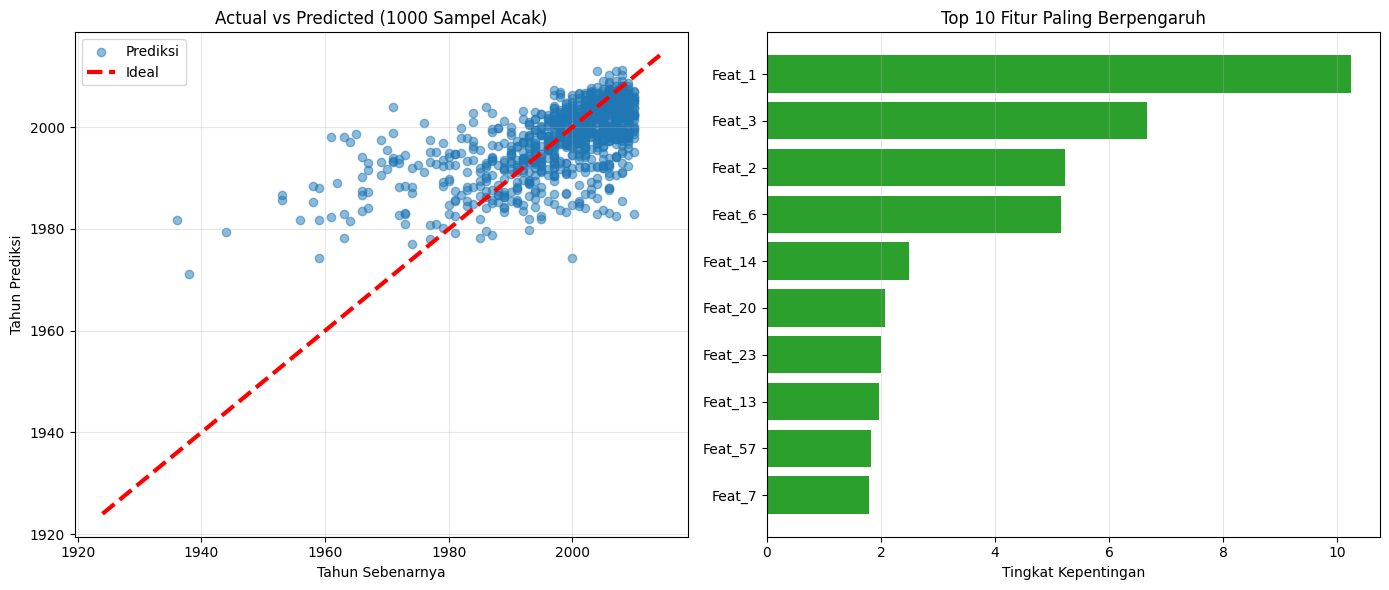

In [ ]:
plt.figure(figsize=(14, 6))

# Plot 1: Prediksi vs Aktual (Sampel)
# Kita ambil sampel acak 1000 titik saja agar grafik ringan & terbaca
idx = np.random.choice(len(y_test), 1000, replace=False)

plt.subplot(1, 2, 1)
plt.scatter(y_test.iloc[idx], y_pred[idx], alpha=0.5, color='#1f77b4', label='Prediksi')

    # Garis diagonal sempurna
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label='Ideal')

plt.xlabel('Tahun Sebenarnya')
plt.ylabel('Tahun Prediksi')
plt.title('Actual vs Predicted (1000 Sampel Acak)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Feature Importance (10 Fitur Teratas)
plt.subplot(1, 2, 2)
# Ambil feature importance dari model
feature_importance = model.get_feature_importance()
sorted_idx = np.argsort(feature_importance)[-10:] # 10 teratas

plt.barh(range(10), feature_importance[sorted_idx], align='center', color='#2ca02c')
plt.yticks(range(10), X.columns[sorted_idx])
plt.xlabel('Tingkat Kepentingan')
plt.title('Top 10 Fitur Paling Berpengaruh')
plt.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Penjelasan Model :

Model ini bertujuan untuk membangun regresi guna memprediksi tahun ("Year") berdasarkan 90 fitur numerik yang tersedia dalam dataset. Proses dimulai dengan persiapan lingkungan kerja, yaitu menginstal pustaka gdown untuk mengunduh dataset berukuran besar (sekitar 422 MB) dari Google Drive dan catboost sebagai algoritma pemodelan. Setelah dataset dimuat menggunakan Pandas, dilakukan pra-pemrosesan data karena file asli tidak memiliki header. Kolom pertama diidentifikasi sebagai target (Tahun), sementara 90 kolom lainnya dinamai secara otomatis sebagai fitur ("Feat_1" s.d "Feat_90"). Total data yang digunakan cukup masif, mencapai lebih dari 515.000 baris.

Tahap selanjutnya adalah pembagian data (splitting) dan pelatihan model. Data dibagi dengan rasio 80% untuk pelatihan (training) dan 20% untuk pengujian (testing). Algoritma yang dipilih adalah CatBoostRegressor, sebuah metode gradient boosting yang efisien. Model ini dikonfigurasi dengan parameter yang cukup kompleks (5000 iterasi dan kedalaman pohon 8) dan diatur untuk berjalan menggunakan akselerasi GPU agar proses pelatihan pada data berskala besar ini dapat berjalan lebih cepat. Terdapat juga mekanisme penanganan kesalahan (error handling) yang otomatis mengalihkan proses ke CPU jika GPU tidak terdeteksi.

Bagian akhir fokus pada evaluasi dan visualisasi hasil. Berdasarkan metrik evaluasi pada data uji, model menghasilkan skor $R^2$ sebesar 0.37853, yang mengindikasikan bahwa model baru mampu menjelaskan sekitar 37.8% varians dari data target. Rata-rata kesalahan absolut (MAE) tercatat sekitar 6 tahun, dengan RMSE sebesar 8.6. Untuk memudahkan analisis, notebook menyertakan dua visualisasi utama: grafik scatter plot yang membandingkan nilai prediksi terhadap nilai aktual (menggunakan sampel acak agar grafik terbaca), serta grafik batang yang menampilkan "Feature Importance" untuk melihat 10 fitur mana yang paling berpengaruh dalam menentukan tahun prediksi.